In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets

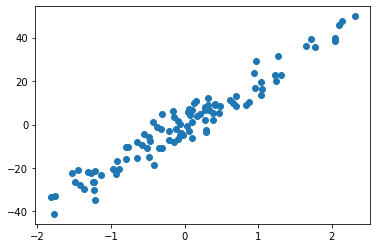

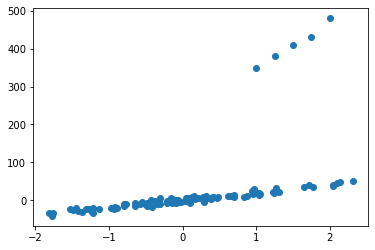

In [2]:
#Generate 100 unary regression data sets
x,y = sklearn.datasets.make_regression(n_features=1,noise=5,random_state=2020)
plt.scatter(x,y)
plt.show()
#Add 5 abnormal data
a = np.linspace(1,2,5).reshape(-1,1)
b = np.array([350,380,410,430,480])

#new data set
x_1 = np.r_[x,a]
y_1 = np.r_[y,b]

plt.scatter(x_1,y_1)
plt.show()

Raw sample fitting parameters：
 [[ 0.19400162]
 [19.7401935 ]]


New sample fitting parameters：
 [[16.17469147]
 [47.08997923]]


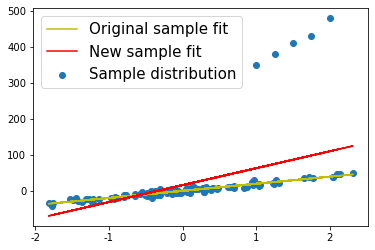

In [3]:
class normal():
    def __init__(self):
        pass

    def fit(self,x,y):
        m=x.shape[0]
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        xMat=np.mat(X)
        yMat =np.mat(y.reshape(-1,1))

        xTx=xMat.T*xMat
        #xTx.I is Inverse matrix of xTx
        ws=xTx.I*xMat.T*yMat
        
        #Return parameter
        return ws
         


#plt.rcParams['font.sans-serif']=['SimHei'] #Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus']=False #Used to display the negative sign normally
clf1 =normal()
#Fit the original data
w1 = clf1.fit(x,y)
#Forecast data
y_pred = x * w1[1] + w1[0]

#Fit new data
w2 = clf1.fit(x_1,y_1)
#Forecast data
y_1_pred = x_1 * w2[1] + w2[0]

print('Raw sample fitting parameters：\n',w1)
print('\n')
print('New sample fitting parameters：\n',w2)

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()


Gradient descent method to solve Ridge regression parameters

In [5]:
#Add the gradient of L2 to the original linear regression gradient
class ridge():
    def __init__(self):
        pass
    
    #Gradient descent method iterative training model parameters, 
    #x is the feature data, y is the label data, a is the learning rate, epochs is the number of iterations, 
    #and Lambda is the regular term parameter
    def fit(self,x,y,a,epochs,Lambda):  
        #Calculate the total amount of data
        m=x.shape[0]
        #Add a bias term to x
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        #Calculate the total number of features
        n = X.shape[1]
        #Initialize the value of W, to become a matrix form
        W=np.mat(np.ones((n,1)))
        #X converted to matrix form
        xMat = np.mat(X)
        #y is converted to matrix form, this step is very important, 
        #and if it is in m x 1 dimensional format
        yMat =np.mat(y.reshape(-1,1))
        #Make loop epochs times
        for i in range(epochs):
            gradient = xMat.T*(xMat*W-yMat)/m + Lambda * W
            W=W-a * gradient
        return W
    def predict(self,x,w):  #The x here should also be biased. What dimension of data is x during training, and the prediction should remain the same
        return np.dot(x,w)

The first parameter of W is the intercept, and the second parameter is the slope, which is the coefficient. It can be seen that the coefficient has become much larger. Just because a few noises are added, the robustness of the model is very poor, and the generalization ability is also Poor, a certain degree of overfitting has occurred.

[[16.17584512]
 [47.08705269]]


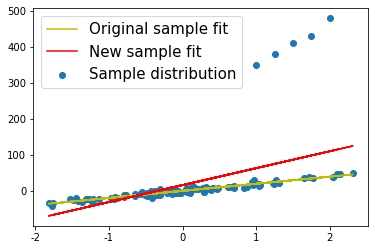

In [6]:
#Linear regression
#Lambda=0
clf = ridge()
w = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda=0)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[11.59968314]
 [31.3174546 ]]


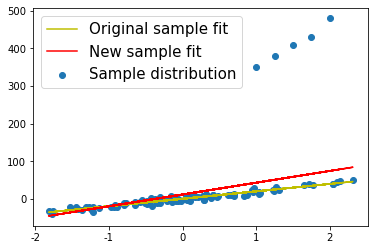

In [7]:
#Lambda=0.5
clf = ridge()
w = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda=0.5)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[ 7.34945813]
 [18.77328279]]


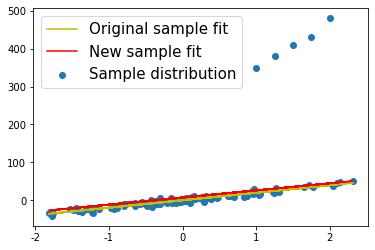

In [9]:
#Lambda=1.5
clf = ridge()
w = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda=1.5)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[0.9360915 ]
 [2.23521051]]


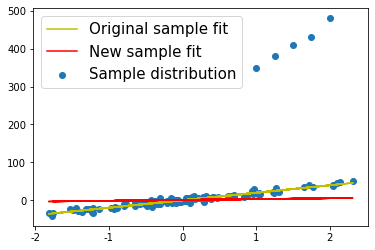

In [10]:
#Lambda=20
clf = ridge()
w = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda=20)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

It can be found that proper L2 regular term parameters can prevent overfitting;
When the Lambda parameter becomes larger and larger, the model parameter becomes smaller and smaller, slowly approaching 0

# Standard equation method to achieve Ridge regression

In [11]:
class standard_ridge():
    def __init__(self):
        pass

    def fit(self,x,y,Lambda):
        m = x.shape[0]
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        xMat= np.mat(X)
        yMat = np.mat(y.reshape(-1,1))

        xTx = xMat.T * xMat
        #Generate identity matrix, 2 matrix rows and columns are equal before they can be added
        #In the previous code of the gradient descent method, we did not omit m. Therefore, when we simplify, we do not omit m either.
        #The final form is to multiply the gradient of the regular term by m, which actually does not cause essential effects.
        rxTx = xTx + np.eye(xMat.shape[1]) * Lambda * m
        
        #rxTx.I is matrix of rxTx
        w = rxTx.I * xMat.T * yMat
        
        return w

In [12]:
clf = standard_ridge()
L0 = clf.fit(x_1,y_1,Lambda=0)
print("Lambda = 0",L0)
L1 = clf.fit(x_1,y_1,Lambda=0.5)
print("Lambda = 0.5",L1)
L2 = clf.fit(x_1,y_1,Lambda=1.5)
print("Lambda = 0.5",L2)
L20 = clf.fit(x_1,y_1,Lambda=20)
print("Lambda = 0.5",L20)

Lambda = 0 [[16.17469147]
 [47.08997923]]
Lambda = 0.5 [[11.59967831]
 [31.31746731]]
Lambda = 0.5 [[ 7.34945813]
 [18.77328279]]
Lambda = 0.5 [[0.9360915 ]
 [2.23521051]]


In [13]:
#using sklearn
from sklearn.linear_model import Ridge
lr=Ridge(alpha=0)
lr.fit(x_1,y_1)
print('alpha=0',lr.coef_,'\n')

lr=Ridge(alpha=40)
lr.fit(x_1,y_1)
print('alpha=40',lr.coef_,'\n')

lr=Ridge(alpha=150)
lr.fit(x_1,y_1)
print('alpha=150',lr.coef_,'\n')

lr=Ridge(alpha=2000)
lr.fit(x_1,y_1)
print('alpha=2000',lr.coef_)

alpha=0 [47.08997923] 

alpha=40 [33.75422018] 

alpha=150 [18.97591442] 

alpha=2000 [2.26893625]
